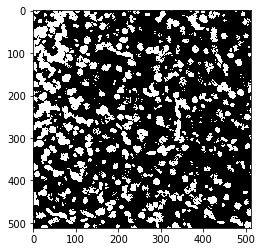

In [32]:
import matplotlib.pyplot as plt

import skimage.io
from skimage.filters import threshold_mean

imname = 'Slice_4_40X_Top_of_Brain.tif'
img = skimage.io.imread(imname)

nucl = img[:, :, 0]

thresh = threshold_mean(nucl)
binary = img_gray > thresh

plt.imshow(binary, cmap='gray')
plt.show()

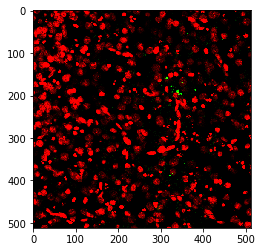

In [3]:
plt.imshow(img)
plt.show()

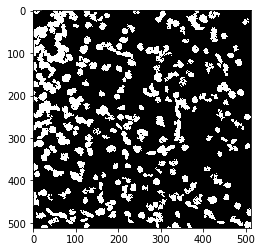

In [4]:
from skimage.morphology import remove_small_objects

clim = remove_small_objects(binary, min_size=100)
plt.imshow(clim, cmap='gray')
plt.show()

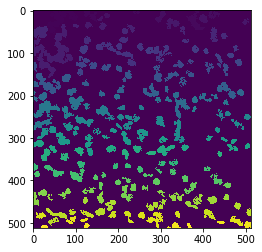

In [5]:
lbim = skimage.measure.label(clim) #clean image that is labeled with each object being a different number

plt.imshow(lbim)
plt.show()

In [6]:
import numpy as np
import math as m

props = skimage.measure.regionprops(lbim)

numobj = lbim.max()

objects = np.zeros((numobj, 6)) #rows, columns

i = 0 
while i < numobj:
    objects[i,0] = (i + 1)
    objects[i,1] = props[i].centroid[0] #x-coordinate
    objects[i,2] = props[i].centroid[1] #y-coordinate
    objects[i,3] = props[i].area
    objects[i,4] = props[i].perimeter  
    objects[i,5] = ((props[i].perimeter)**2)/(4*m.pi*props[i].area)
    i = i + 1

In [7]:
import numpy as np 

threshold = 2 #roundness ratio set

onlyround = lbim.copy()

i = 0
numobj = onlyround.max()
while i < numobj:
    if objects[i,5] > threshold:
        objects = np.delete(objects, (i), axis=0)
        sizeobj = np.zeros((1, int(objects[i,3])))
        for j in sizeobj:
            onlyround[onlyround == i] = 0
    numobj = len(objects)
    i = i + 1

Text(0.5,1,'Remove Non-Round Cells')

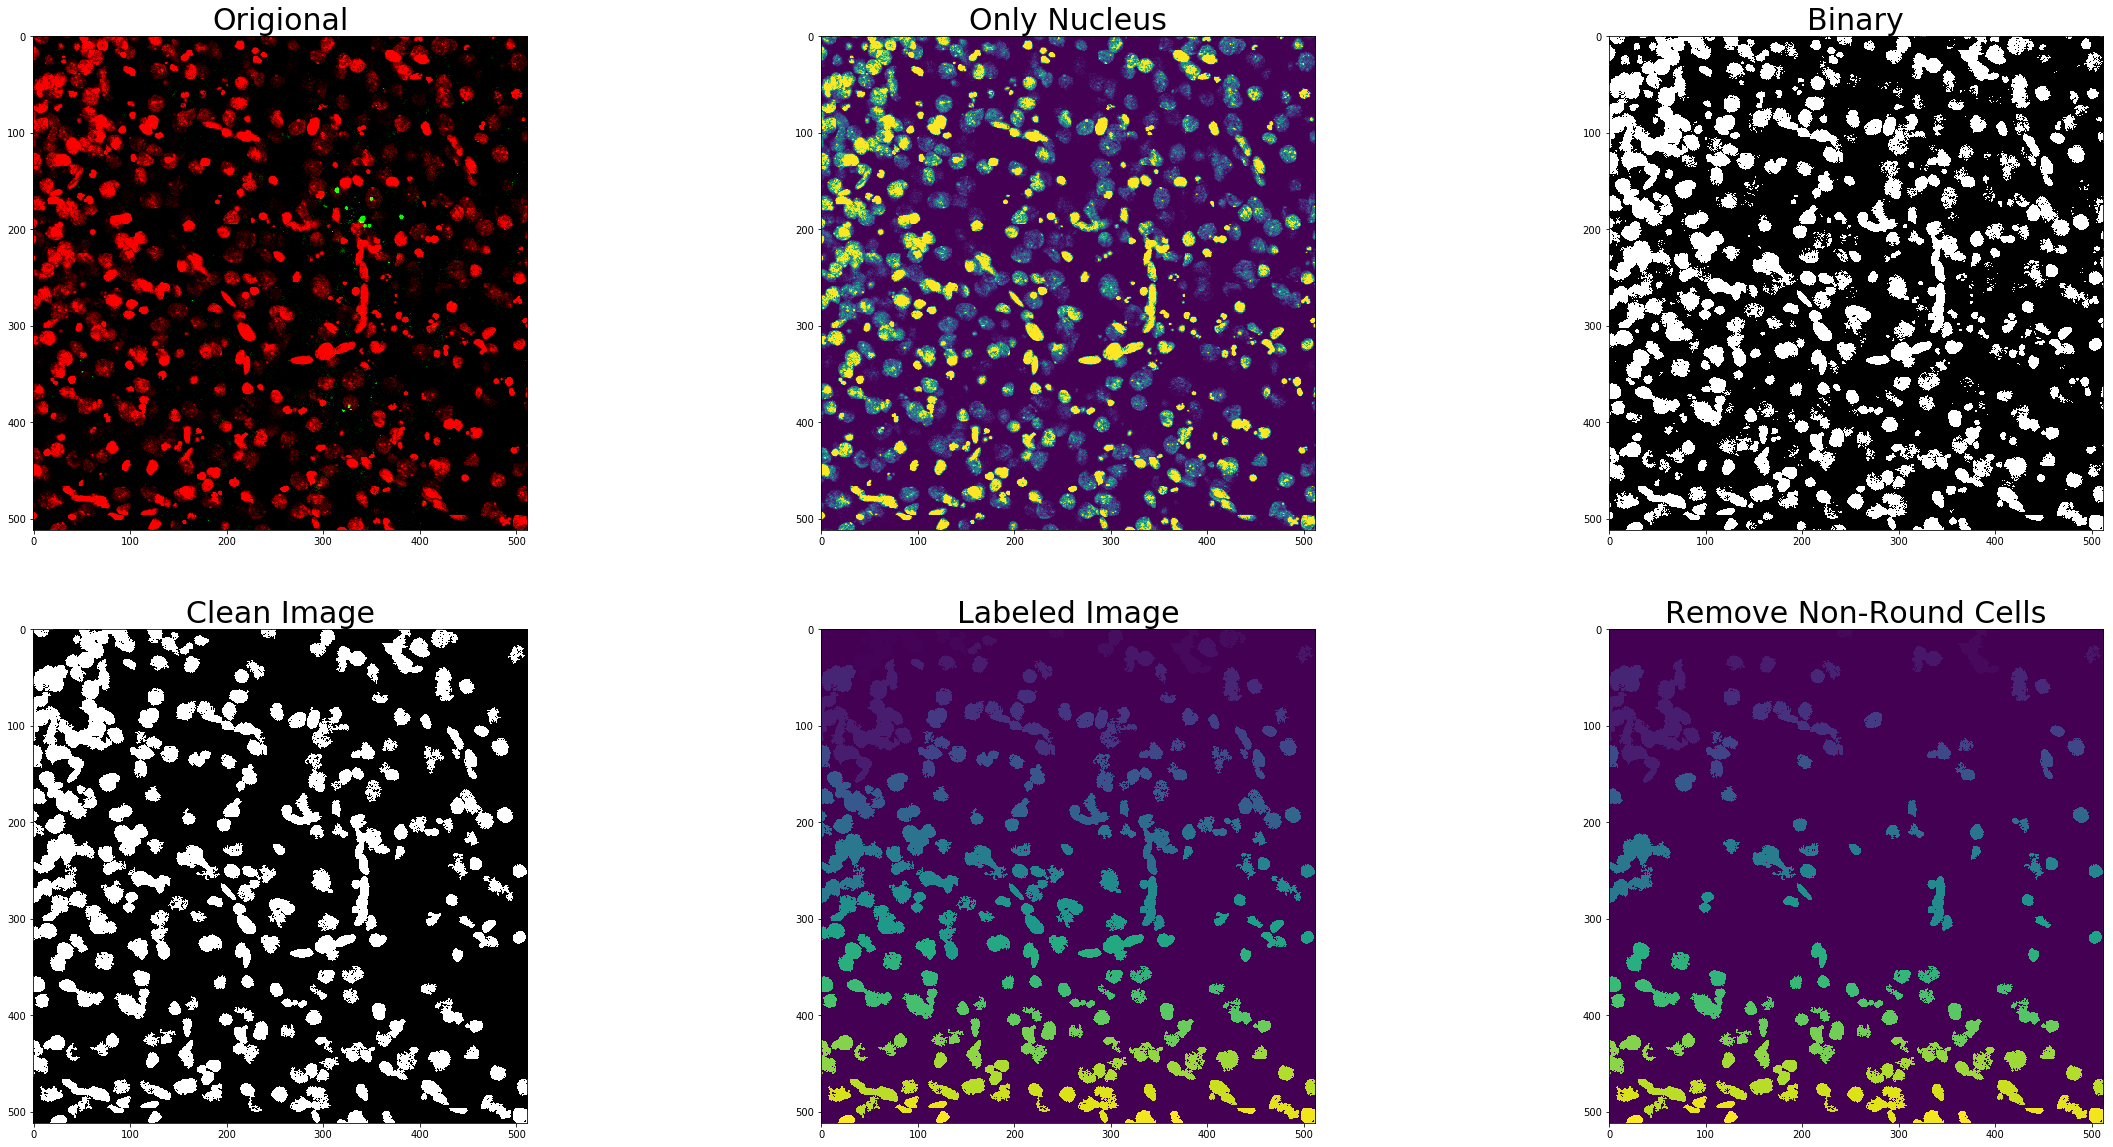

In [40]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(40,20))

a = fig.add_subplot(2,3,1)
imgplot = plt.imshow(img)
a.set_title('Origional', fontsize=30)

a = fig.add_subplot(2,3,2)
imgplot = plt.imshow(nucl)
a.set_title('Only Nucleus', fontsize=30)

a = fig.add_subplot(2,3,3)
imgplot = plt.imshow(binary, cmap='gray')
a.set_title('Binary', fontsize=30)

a=fig.add_subplot(2,3,4)
imgplot = plt.imshow(clim, cmap='gray')
a.set_title('Clean Image', fontsize=30)

a = fig.add_subplot(2,3,5)
imgplot = plt.imshow(lbim)
a.set_title('Labeled Image', fontsize=30)

a=fig.add_subplot(2,3,6)
imgplot = plt.imshow(onlyround)
a.set_title('Remove Non-Round Cells', fontsize=30)

In [ ]:
part = [n, 2] #n-particles, x/y coordinates
for i in range(0,n):
    dist = ED [part[n:0],part[n:1]]

In [ ]:
How many centers are in the surrounding area?
Draw a circle around each cell and determine the area covered by cells?

Print out average cell area, perimeter, number of cells etc. 

Watershed